# Regression

Finding a mathematical relationship (function) in the input data. Initially, regression had the meaning of regress to the mean of the values. As described in an experiment regarding the height of parents and children. After collecting the data, researchers found out that the distribution of the height of the children compared with their parents follow a line with slope equals 2/3. Thus, all values tend to "regress" to the mean after some generations.

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/edX/GTx/CS7641/SL2/images/relation_heights.svg" align="center" width="300"/>

## Finding the best constant function:

Input:

|  x  |  y  |
| --- | --- |
| x_1 | y_1 |
| x_2 | y_2 |
| ... | ... |
| x_n | y_n |

Function:

$$f(x) = c$$
$$E(c) = \sum_{i=1}^n (y_i - c)^2$$

<img src="https://cdn.rawgit.com/rogergranada/MOOCs/master/edX/GTx/CS7641/SL2/images/error.svg" align="center" width="300"/>

Loss:

$$\frac{\partial E(c)}{\partial c} = \sum_{i=1}^{n} 2(y_i - c)(-1)$$
$$\frac{\partial E(c)}{\partial c} = \sum_{i=1}^{n} (y_i - c) = 0$$
$$\sum_{i=1}^{n} y_i - \sum_{i=1}^{n} c = 0$$
$$n.c = \sum_{i=1}^{n} y_i$$
$$c =  \sum_{i=1}^{n} \frac{y_i}{n} \ \ \ \leftarrow \text{MEAN}$$


Information about the derivatives fo the MSE function can be seen here in the [link](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

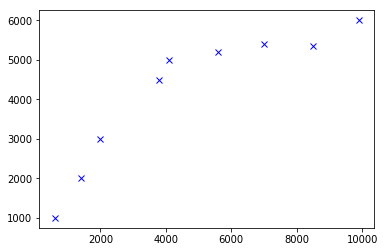

In [149]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

house_prices = [1000, 2000, 3000, 4500, 5000, 5200, 5400, 5350, 6000]
house_sizes =  [600, 1400, 2000, 3800, 4100, 5600, 7000, 8500, 9900]

ones = np.array([ 1 for i in range(0, len(house_prices))])
X = np.array(house_sizes).reshape(-1, 1)
y = np.array(house_prices).reshape(-1, 1)
ones = ones.reshape(-1, 1)
X = np.matrix(np.concatenate((ones, X), axis=1))

plt.plot(house_sizes, house_prices, 'bx')
plt.show()

## Draw a line considering two points 

Let's consider two points in the plot and draw a line that fit some of the points. Observing all points we select the pairs ($x$, $y$): (1400, 2000) and (9900, 6000). Thus, calculating $\theta_0$ and $\theta_1$ in the equation:

$$y = \theta_0 + \theta_1x$$

we have:

$$y = \theta_0 + \theta_1x \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ y = \theta_0 + \theta_1x$$
$$2000 = \theta_0 + 1400\theta_1  \ \ \ \ \  6000 = \theta_0 + 9900\theta_1$$
$$\ \ \ \ \ \ \ \ \theta_1 = \frac{2000 - \theta_0}{1400} \ \ \ \ \ \ \ \ \ \ \ \ \theta_0 = 6000 - 9900\theta_1$$

Looking for the $\theta_1$ value:

$ \theta_1 = \frac{2000 - \theta_0}{1400} $<br>
$ \theta_1 = \frac{2000 - (6000 - 9900\theta_1)}{1400} $<br>
$ 1400\theta_1 = 4000 - 9900\theta_1 $<br>
$ 9900\theta_1 - 1400\theta_1 = 4000 $<br>
$ \theta_1 = \frac{4000}{8500} $
$ \theta_1 = 0.47 $

Changing the value of $\theta_1$ in $\theta_0$ equation:

$ \theta_0 = 6000 - 9900\theta_1 $<br>
$ \theta_0 = 6000 - 9900(0.47) $<br>
$ \theta_0 = 6000 - 4658,82 $<br>
$ \theta_0 = 1341.17 $

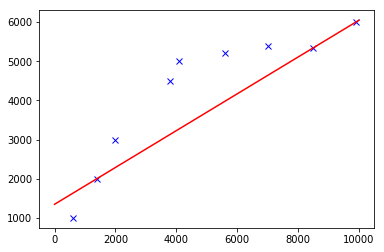

In [10]:
def draw_line(X, y, thetas):
    """ Draw a line with values of theta """
    vfx = []
    for val in range(1,10000):
        fx = thetas[0] + thetas[1]*val
        vfx.append(fx)
    
    plt.plot(X, y, 'bx')
    plt.plot(range(1,10000), vfx, 'r')
    plt.show()
    
thetas = np.array([1347.17, 0.47])
draw_line(house_sizes, house_prices, thetas)

# Loss

For the calculated line, let's calculate the loss as the Mean Squared Error (MSE), given by the equation

$$ \mathcal{L}(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h(x)_i - y_i)^2 $$

where:

$$ h(x)_i = \theta_0 + \theta_1x_i $$

In [146]:
# Calculate loss
def forward(X, thetas):
    """ Perform forward by matrix multiplication 
    X: np.matrix (n, 2)
        [[1, X0],[1, X1], [1, X2],...,[1, Xn]]
    thetas: np.matrix (1, 2)
        [theta0, theta1]
    Return:
    pred : np.matrix (1, n)
    """
    pred = np.dot(X, thetas.T)
    pred = pred.reshape(-1, 1)
    return pred
    
    
def loss(X, y, thetas):
    """ Compute loss function """
    dtheta = [0.0, 0.0]
    pred = forward(X, thetas)
    dif = (pred - y)
    error = np.power((pred - y), 2)
    J = np.sum(error)/(2*X.shape[0])
    return J


In [147]:
# Check loss for the line created initially
theta_calculated = np.array([1341.17, 0.47])
print 'Initial loss:', loss(X, y, theta_calculated)

Initial loss: 3951748.063338889


## Initializing theta values with random data

Let's initialize the theta values with random data and check the loss. Then, we will interatively update the values of theta according to their loss and learning rate.

In [150]:
# Create a theta matrix
np.random.seed(seed=0)
thetas = np.array([float(np.random.random(1)), float(np.random.random(1))])

print 'Shape X:', X.shape
print 'Shape y:', y.shape
print 'Shape theta:', thetas.shape, '- with values:' 
print thetas

Shape X: (9, 2)
Shape y: (9, 1)
Shape theta: (2,) - with values:
[0.5488135  0.71518937]


In [151]:
# Draw line with corresponding thetas
#draw_line(house_sizes, house_prices, thetas)
print 'Initial loss:', loss(X, y, thetas)

Initial loss: 806296.7727448517


## Gradient Descent

In order to update the theta values, we perform gradient descent, which will update values based on the derivative score of the cost function and the learning rate. Thus, we compute:

- Cost function (loss):

$$ \mathcal{L}(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h(x)_i - y_i)^2 $$

where:

$$ h(x)_i = \theta_0 + \theta_1x_i $$

- With the objective:

$$ \underset{\theta_0, \theta_1}{\text{argmin}}\  \mathcal{L}(\theta_0, \theta_1)$$

- With the update rules:

$$ \theta_0 := \theta_0 - \alpha \frac{\partial}{\partial\theta_0}\mathcal{L}(\theta_0, \theta_1)$$
$$ \theta_1 := \theta_1 - \alpha \frac{\partial}{\partial\theta_1}\mathcal{L}(\theta_0, \theta_1)$$

- With derivatives:

$$\frac{\partial}{\partial\theta_0}\mathcal{L}(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h(x)_i - y_i)$$
$$\frac{\partial}{\partial\theta_1}\mathcal{L}(\theta_0, \theta_1) = \frac{1}{m} \sum_{i=1}^{m} (h(x)_i - y_i)x_i$$

In [241]:

house_prices = [1000, 2000, 3000, 4500, 5000, 5200, 5400, 5350, 6000]
house_sizes =  [600, 1400, 2000, 3800, 4100, 5600, 7000, 8500, 9900]

ones = np.array([ 1 for i in range(0, len(house_prices))])
X = np.array(house_sizes).reshape(-1, 1)
y = np.array(house_prices).reshape(-1, 1)
ones = ones.reshape(-1, 1)
X = np.matrix(np.concatenate((ones, X), axis=1))
np.random.seed(seed=0)
thetas = np.array([float(np.random.random(1)), float(np.random.random(1))])

#############################################################################3

def loss(X, y, thetas):
    """ Compute loss function with derivates of the cost """
    dtheta = [0.0, 0.0]
    pred = forward(X, thetas)
    error = np.power((pred - y), 2)
    for i in range(0, len(dtheta)):
        dtheta[i] = np.sum(np.multiply(error, X[:,i]))/X.shape[0]
    J = np.sum(error)/(2*X.shape[0])
    return J

def gradient_descent(X, y, thetas, lr):
    new_thetas = np.zeros(thetas.shape)
    error = forward(X, thetas) - y
    for p in range(0, thetas.shape[0]):
        term = np.multiply(error, X[:,p])
        new_thetas[p] = (lr/X.shape[0])*np.sum(term)
    
    new_thetas[0] = thetas[0] - new_thetas[0]
    new_thetas[1] = thetas[1] - new_thetas[1]
    return new_thetas

>> [0.5488135  0.71518937]


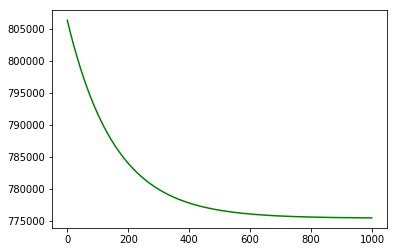

[0.54887399 0.75734443]


In [257]:
pseudo_thetas = thetas[:]
print '>>',pseudo_thetas
xaxis = []
yaxis = []
for i in range(0, 1000):
    xaxis.append(i)
    cost = loss(X, y, pseudo_thetas)
    yaxis.append(cost)
    pseudo_thetas = gradient_descent(X, y, pseudo_thetas, 1e-10)
    
plt.plot(xaxis, yaxis, 'g')
plt.show()
print pseudo_thetas

## Checking the fitting with new thetas 

Now, with the new thetas, plot a line to check how it fits the data.

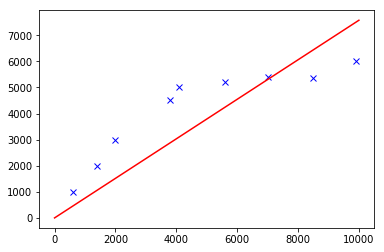

In [259]:
draw_line(house_sizes, house_prices, pseudo_thetas)